## Genetic Algorithm Overview
Flowchart of the genetic algorithm is shown below. Each step involved in GA has some variations.
<img src="GAF.png" alt="GAF" width="300"/>

## Practical
The y=target is to maximize this equation ASAP:
<br>
y = w<sub>1</sub>x<sub>1</sub> + w<sub>2</sub>x<sub>2</sub> + w<sub>3</sub>x<sub>3</sub> + w<sub>4</sub>x<sub>4</sub> + w<sub>5</sub>x<sub>5</sub> + w<sub>6</sub>x<sub>6</sub>
<br>
What are the best values for 6 weights w<sub>1</sub> to w<sub>6</sub>?
<br>
We are going to use the genetic algorithm for the best possible values after a number of generations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GA

In [2]:
# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

In [3]:
# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

# Genetic algorithm parameters - mating pool size, population size
sol_per_pop = 8
num_parents_mating = 4

In [4]:
# Defining the population size.
# The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
pop_size = (sol_per_pop,num_weights)
# Creating the initial population.
new_population = np.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[ 3.6597158  -3.31845881 -0.56936487 -2.6628049   3.99387812  2.61362239]
 [-2.01068392  2.33796345  0.38596159 -2.75901837  0.47852978 -1.98024672]
 [-1.72970834  1.17893266 -2.91674312 -1.7018825   1.6943371  -0.87685415]
 [ 3.29682578  1.4023225   2.75886187  2.73535153 -0.38998895 -1.24159343]
 [-0.35656182 -0.15965772  1.45216966  1.93024646  3.35855437 -3.13425222]
 [-1.70554215 -3.59461246  1.60499271  3.8451219  -0.77863486  0.31457885]
 [ 2.5276552   2.96448045  3.55242268  1.34474237  2.41944395  1.19633619]
 [-2.565797   -3.73606158  1.64268189  2.45178461  0.95382516 -3.66221093]]


<img src="crossover and mutation.png" alt="GAF" height="300"/>

In [5]:
best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    if (generation == 0) or (generation == 999):
        print("\nGeneration #", generation+1)
    
    # Measuring the fitness of each chromosome in the population.
    fitness = GA.cal_pop_fitness(equation_inputs, new_population)
    if (generation == 0) or (generation == 999):
        print("\nFitness values: \n", fitness)
    
    # Selecting the best parents in the population for mating.
    parents = GA.select_mating_pool(new_population, fitness, num_parents_mating)
    if (generation == 0) or (generation == 999):
        print("\nSelected parents: \n", parents)
    
    # Generating next generation using crossover.
    offspring_crossover = GA.crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    if (generation == 0) or (generation == 999):
        print("\nCrossover result: \n", offspring_crossover)
    
    # Adding some variations to the offspring using mutation.
    offspring_mutation = GA.mutation(offspring_crossover)
    if (generation == 0) or (generation == 999):
        print("\nMutation result: \n", offspring_mutation)
    
    best_outputs.append(np.max(np.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    if (generation == 0) or (generation == 999):
        print("\nBest result after generation #", generation+1, ": ", np.max(np.sum(new_population*equation_inputs, axis=1)))
        print("\n")

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation


Generation # 1

Fitness values: 
 [-50.24770532 -21.11955688 -42.51120568  43.84079983  -8.58621842
  32.29660319  -8.89781245  21.93755948]

Selected parents: 
 [[ 3.29682578  1.4023225   2.75886187  2.73535153 -0.38998895 -1.24159343]
 [-1.70554215 -3.59461246  1.60499271  3.8451219  -0.77863486  0.31457885]
 [-2.565797   -3.73606158  1.64268189  2.45178461  0.95382516 -3.66221093]
 [-0.35656182 -0.15965772  1.45216966  1.93024646  3.35855437 -3.13425222]]

Crossover result: 
 [[ 3.29682578  1.4023225   2.75886187  3.8451219  -0.77863486  0.31457885]
 [-1.70554215 -3.59461246  1.60499271  2.45178461  0.95382516 -3.66221093]
 [-2.565797   -3.73606158  1.64268189  1.93024646  3.35855437 -3.13425222]
 [-0.35656182 -0.15965772  1.45216966  2.73535153 -0.38998895 -1.24159343]]

Mutation result: 
 [[ 3.29682578  1.4023225   2.75886187  3.8451219  -0.36969456  0.31457885]
 [-1.70554215 -3.59461246  1.60499271  2.45178461  1.94253511 -3.66221093]
 [-2.565797   -3.73606158  1.64268189  1.930

In [6]:
# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = GA.cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))

print("Best solution: ", new_population[best_match_idx, :])
print("Best solution fitness: ", fitness[best_match_idx])

Best solution:  [[[   3.29682578    1.4023225     2.75886187    2.73535153 -376.72689862
     -1.24159343]]]
Best solution fitness:  [4183.5468062]


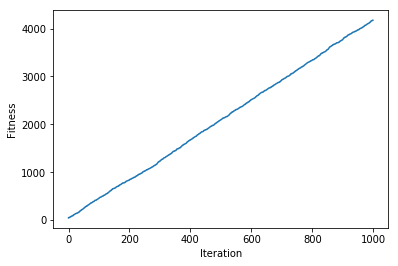

In [7]:
plt.plot(best_outputs)
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()